In [0]:
# Importing required packages
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio
from sklearn.decomposition import PCA
import itertools
import operator
import random
import collections
from scipy import stats
from sklearn.metrics import accuracy_score

In [0]:
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict_1 = pickle.load(fo, encoding='Latin1')
    return dict_1

Visualization

In [0]:
def get_data(file):
  dict_1 = unpickle(file)
  X = np.asarray(dict_1['data']).astype("uint8")
  Y = np.asarray(dict_1['labels'])
  names = np.asarray(dict_1['filenames'])
  list_class=(unpickle("AIML_DS_CIFAR-10_STD/batches.meta")['label_names'])
  return X,Y,names,list_class

In [0]:
# Function to visualize the data
def visualize_image(X, Y, names, image_id,size=(5,5)):
    rgb = X[image_id,:]
    plt.figure(figsize = size)
    img = rgb.reshape(3, 32, 32).transpose([1, 2, 0])
    print(img.shape)
    plt.grid(False)
    plt.imshow(img)
    plt.title(names[image_id])
    plt.show()

Class = horse
(32, 32, 3)


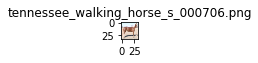

(32, 32, 3)


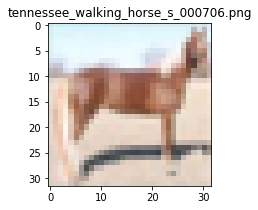

In [5]:
# Read 10000 images -- from batch 3
X, Y, names, classes = get_data("AIML_DS_CIFAR-10_STD/data_batch_3")
# Display the 10th image
pick = 10
print("Class =",classes[Y[pick]])
visualize_image(X, Y, names, pick,size=(0.3,0.3)) # output image would be a blured image
visualize_image(X, Y, names, pick,size=(3,3))

Unpickle and train/test

In [0]:
X_train = []
Y_train = []
for j in "12345": 
    batch_file = 'AIML_DS_CIFAR-10_STD/data_batch_'+ j
    x_train, y_train, names_train, classes_train = get_data(batch_file)
    X_train.extend(x_train)
    Y_train.extend(y_train)

X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

X_test, Y_test, names_test, classes_test = get_data("AIML_DS_CIFAR-10_STD/test_batch")

In [7]:
Y_test.shape, Y_train.shape, X_test.shape, X_train.shape

((10000,), (50000,), (10000, 3072), (50000, 3072))

In [0]:
# Function to extract the classes
def extract_3classes(class0, class1,class2, X, Y):
    # Select class #0
    X_0 = X[Y == class0]
    Y_0 = Y[Y == class0]
    # Select class #1
    X_1 = X[Y == class1]
    Y_1 = Y[Y == class1]
    # Select class #2
    X_2 = X[Y == class2]
    Y_2 = Y[Y == class2]
    # Join the two classes to make the set
    X_3classes = np.vstack((X_0, X_1,X_2))
    Y_3classes = np.concatenate((Y_0, Y_1,Y_2))
    return X_3classes, Y_3classes

In [0]:
# Select classes #5 and #7
X_train_3classes, Y_train_3classes = extract_3classes(5, 7,9, X_train, Y_train)
X_test_3classes, Y_test_3classes = extract_3classes(5, 7,9, X_test, Y_test)

In [10]:
Y_train_3classes

array([5, 5, 5, ..., 9, 9, 9])

Training classifier (MLP sklearn)

In [11]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation= "relu",solver= "lbfgs" ,hidden_layer_sizes = (15,10) ,learning_rate = 'constant',learning_rate_init=0.01)
# Fitting the data into the model
clf.fit(X_train_3classes, Y_train_3classes)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 10), learning_rate='constant',
              learning_rate_init=0.01, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Accuracy

In [12]:
pred = clf.predict(X_test_3classes)
accuracy_score(pred, Y_test_3classes)

0.33066666666666666

PCA

In [0]:
pca = PCA(n_components=800) 
pca_train_features = pca.fit_transform(X_train_3classes)
pca_test_features = pca.fit_transform(X_test_3classes)

In [14]:
clf.fit(pca_train_features, Y_train_3classes)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 10), learning_rate='constant',
              learning_rate_init=0.01, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Accuracy of above PCA feature pred

In [15]:
pred = clf.predict(pca_test_features)

accuracy_score(pred, Y_test_3classes)


0.31566666666666665

Loading deep features

In [0]:
features = sio.loadmat('AIML_DS_CIFAR-10_STD/cifar10_deep_features.mat')

In [17]:
features

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Jan 12 22:45:23 2018',
 '__version__': '1.0',
 'x_test': array([[ 0.33345997,  0.37266153,  0.09824684, ...,  0.1762989 ,
         -0.62388366,  1.3253    ],
        [-2.0737371 ,  1.7098147 ,  1.6106052 , ...,  0.49063668,
          0.59258294, -0.843072  ],
        [-1.7539737 ,  1.5179265 ,  1.512643  , ...,  0.47429788,
          0.8105953 , -0.87590677],
        ...,
        [ 0.5082875 ,  0.3646992 ,  2.015987  , ...,  0.25853962,
         -0.36517864, -1.3577914 ],
        [ 0.17210843,  1.4968457 ,  1.5449362 , ...,  0.21191677,
          1.5700037 , -0.01307811],
        [ 0.18151811, -0.08158754,  0.81734157, ...,  0.06941161,
          1.6887033 , -0.75160795]], dtype=float32),
 'x_train': array([[ 0.19199947,  1.6310866 ,  1.8007108 , ..., -2.2080474 ,
          0.04882409,  1.0439223 ],
        [ 0.73592114,  0.2177245 ,  0.06937354, ..., -1.5942848 ,
         -0.8278478 , -0.70234483

In [18]:
# Extracting the deep features into training and testing
deep_features_train = features['x_train']
deep_labels_train = np.squeeze(np.transpose(features['y_train']))
deep_features_test = features['x_test']
deep_labels_test = np.squeeze(np.transpose(features['y_test']))
print(deep_features_train.shape, deep_labels_train.shape, deep_features_test.shape, deep_labels_test.shape)

(50000, 512) (50000,) (10000, 512) (10000,)


In [0]:
# Extract features of class0 and class1
deep_features_train_3classes, deep_labels_train_3classes = extract_3classes(5, 7,9, deep_features_train, np.squeeze(deep_labels_train))
deep_features_test_3classes, deep_labels_test_3classes = extract_3classes(5, 7,9, deep_features_test, np.squeeze(deep_labels_test))

Triaining classifier with deep features

In [20]:
clf.fit(deep_features_train_3classes, deep_labels_train_3classes)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 10), learning_rate='constant',
              learning_rate_init=0.01, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Accuracy

In [21]:
pred = clf.predict(deep_features_test_3classes)

accuracy_score(pred, deep_labels_test_3classes)

0.9733333333333334